In [1]:
#import package

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import os
import pickle

In [2]:
#load data
#data directory
PICKLE_TRAIN_DIR=os.path.join("..","processed_data","train_data.pkl")
PICKLE_HISTORY_DIR=os.path.join("..","processed_data","history_data.pkl")

In [3]:
#load data into dataframe
hist_data= pd.read_pickle(PICKLE_HISTORY_DIR)
train = pd.read_pickle(PICKLE_TRAIN_DIR)

#Feature Engineering - continuous data

#price of hist data
we will create new features using the average of the year

In [4]:
mean_year = hist_data.groupby(["id"]).mean().reset_index()

In [5]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
                                                 "price_p2_var": "mean_year_price_p2_var",
                                                 "price_p3_var": "mean_year_price_p3_var",
                                                 "price_p1_fix": "mean_year_price_p1_fix",
                                                 "price_p2_fix": "mean_year_price_p2_fix",
                                                 "price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [6]:
features = mean_year

#Feature Engineering - Train Data

Length of the service : 
tenure = date_end - date_activ

In [7]:
train['tenure'] = ((train['date_end'] - train['date_activ'])/np.timedelta64(1, 'Y')).astype(int)

In [8]:
tenure = train[['tenure', 'churn', 'id']].groupby(['tenure', 'churn'])['id'].count().unstack(level = 1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

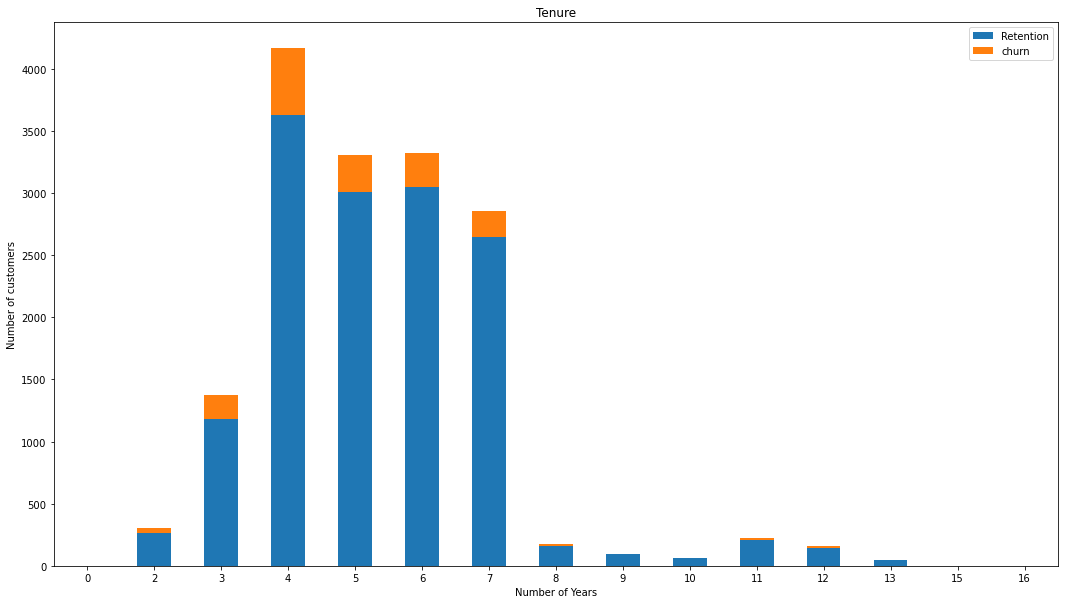

In [9]:
tenure.plot(kind='bar',
             figsize=(18,10),
             stacked=True,
            rot = 0,
             title='Tenure')
#labels
plt.ylabel('Number of customers')
plt.xlabel('Number of Years')
#Rename legend
plt.legend(['Retention', 'churn'], loc='upper right')

plt.show()

We can see that churn is low for customers which join lately or have made the contract for more than 7 years
Most churn customers happen within 3-7 years.

In [10]:
#Feature Engineering - Categorical Data

In [11]:
#Transform boolean data - onehot encoding
train['has_gas'] = train['has_gas'].replace(['t','f'], [1,0])

In [12]:
print(pd.pivot_table(train, index = 'has_gas', columns = 'churn', values='id', aggfunc ='count'))

churn        0     1
has_gas             
0        11771  1361
1         2730   234


In [13]:
print('churn rate of customers do not have gas is:', 1361/(1361+11771)*100, '%')
print('churn rate of customers have gas is:', 234/(234+2730)*100, '%')

churn rate of customers do not have gas is: 10.36399634480658 %
churn rate of customers have gas is: 7.894736842105263 %


churn rate related customers have gas or not is not significant 

In [14]:
#Categorical data - 'channel_sales'
#replace all nan values with a string called null_values-channel

train['channel_sales'] = train['channel_sales'].fillna('null_values-channel')

In [15]:
#now transform the channel_sales column into categorical data type
train['channel_sales']= train['channel_sales'].astype('category')

In [16]:
pd.DataFrame({'Samples in category': train['channel_sales'].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values-channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


we have to create 8 different dummy variables, each will have a different column

In [17]:
#create dummy variables
categories_channel = pd.get_dummies(train['channel_sales'], prefix = 'channel')

In [18]:
#rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [19]:
categories_channel.head()

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [20]:
#remove null value
categories_channel.drop(columns=['channel_nul'], inplace = True)

In [21]:
#Categorical data - 'origin_up'
#replace all nan values with a string called null_values-origin
train['origin_up'] = train['origin_up'].fillna('null_values_origin')

In [22]:
#now transform the channel_sales column into categorical data type
train['origin_up']= train['origin_up'].astype('category')

In [23]:
pd.DataFrame({'Samples in category': train['origin_up'].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


we have to create 6 different dummy variables, each will have a different column

In [24]:
#create dummy variables
categories_origin = pd.get_dummies(train['origin_up'], prefix = 'origin')

In [25]:
#rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [26]:
categories_origin.head()

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [27]:
#remove null value
categories_origin.drop(columns=['origin_nul'], inplace = True)

In [28]:
#Categorical data - 'activity_new'
#replace all nan values with a string called null_values_activity
train['activity_new'] = train['activity_new'].fillna('null_values_activity')

In [29]:
categories_activity =pd.DataFrame({'Samples in activity': train['activity_new'].value_counts()})
categories_activity

,Samples in activity
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
moaawbkafpwcopipaxsoklsuuoexkaap,1
kimmoxipdxfalcpoueuwkddauubioiwl,1
iuicsodpwomiidiakdpdkxomecpxcdod,1
xbwipkcuemuidpumuiomukkicculdmsb,1


In [30]:
#get tge categories with less 75 samples and replace them with null value
to_replace = list(categories_activity[categories_activity['Samples in activity']<= 75].index)
train['activity_new'] = train['activity_new'].replace(to_replace, 'null_calues_activity')

In [31]:
#create dummy variables
categories_activity = pd.get_dummies(train['activity_new'], prefix = 'activity')

In [32]:
#rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]

In [33]:
categories_activity.head()

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [34]:
#remove null value
categories_activity.drop(columns=['activity_nul'], inplace = True)

#merge dummy variables to main dataframe
merge all the neww categories into our main dataframe and remove the old categorical columns

In [35]:
train=pd.merge(train, categories_activity, left_index = True, right_index=True)
train=pd.merge(train, categories_channel, left_index = True, right_index=True)
train=pd.merge(train, categories_origin, left_index = True, right_index=True)

In [36]:
#remove old categorical columns
train.drop(columns=['channel_sales', 'origin_up', 'activity_new'], inplace = True)

#Log transformation
some predictive models make fundamental assumption related to variable being 'narmal distributed', the model will perform poorly if the data is highly skewed.

In [37]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,...,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,...,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Particularly relevant to look at the standard deviation std which is very very high for some variables.
Log transformation does not work with negative data, so we will convert the negative values to NaN .

In [38]:
#remove nagetive value
train.loc[train.cons_12m < 0,"cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
train.loc[train.cons_last_month < 0,"cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
train.loc[train.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
train.loc[train.imp_cons < 0,"imp_cons"] = np.nan

In [39]:
#Also we cannot apply a log transformation to 0 valued entries, so we will add a constant 1
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log10(train["imp_cons"]+1)

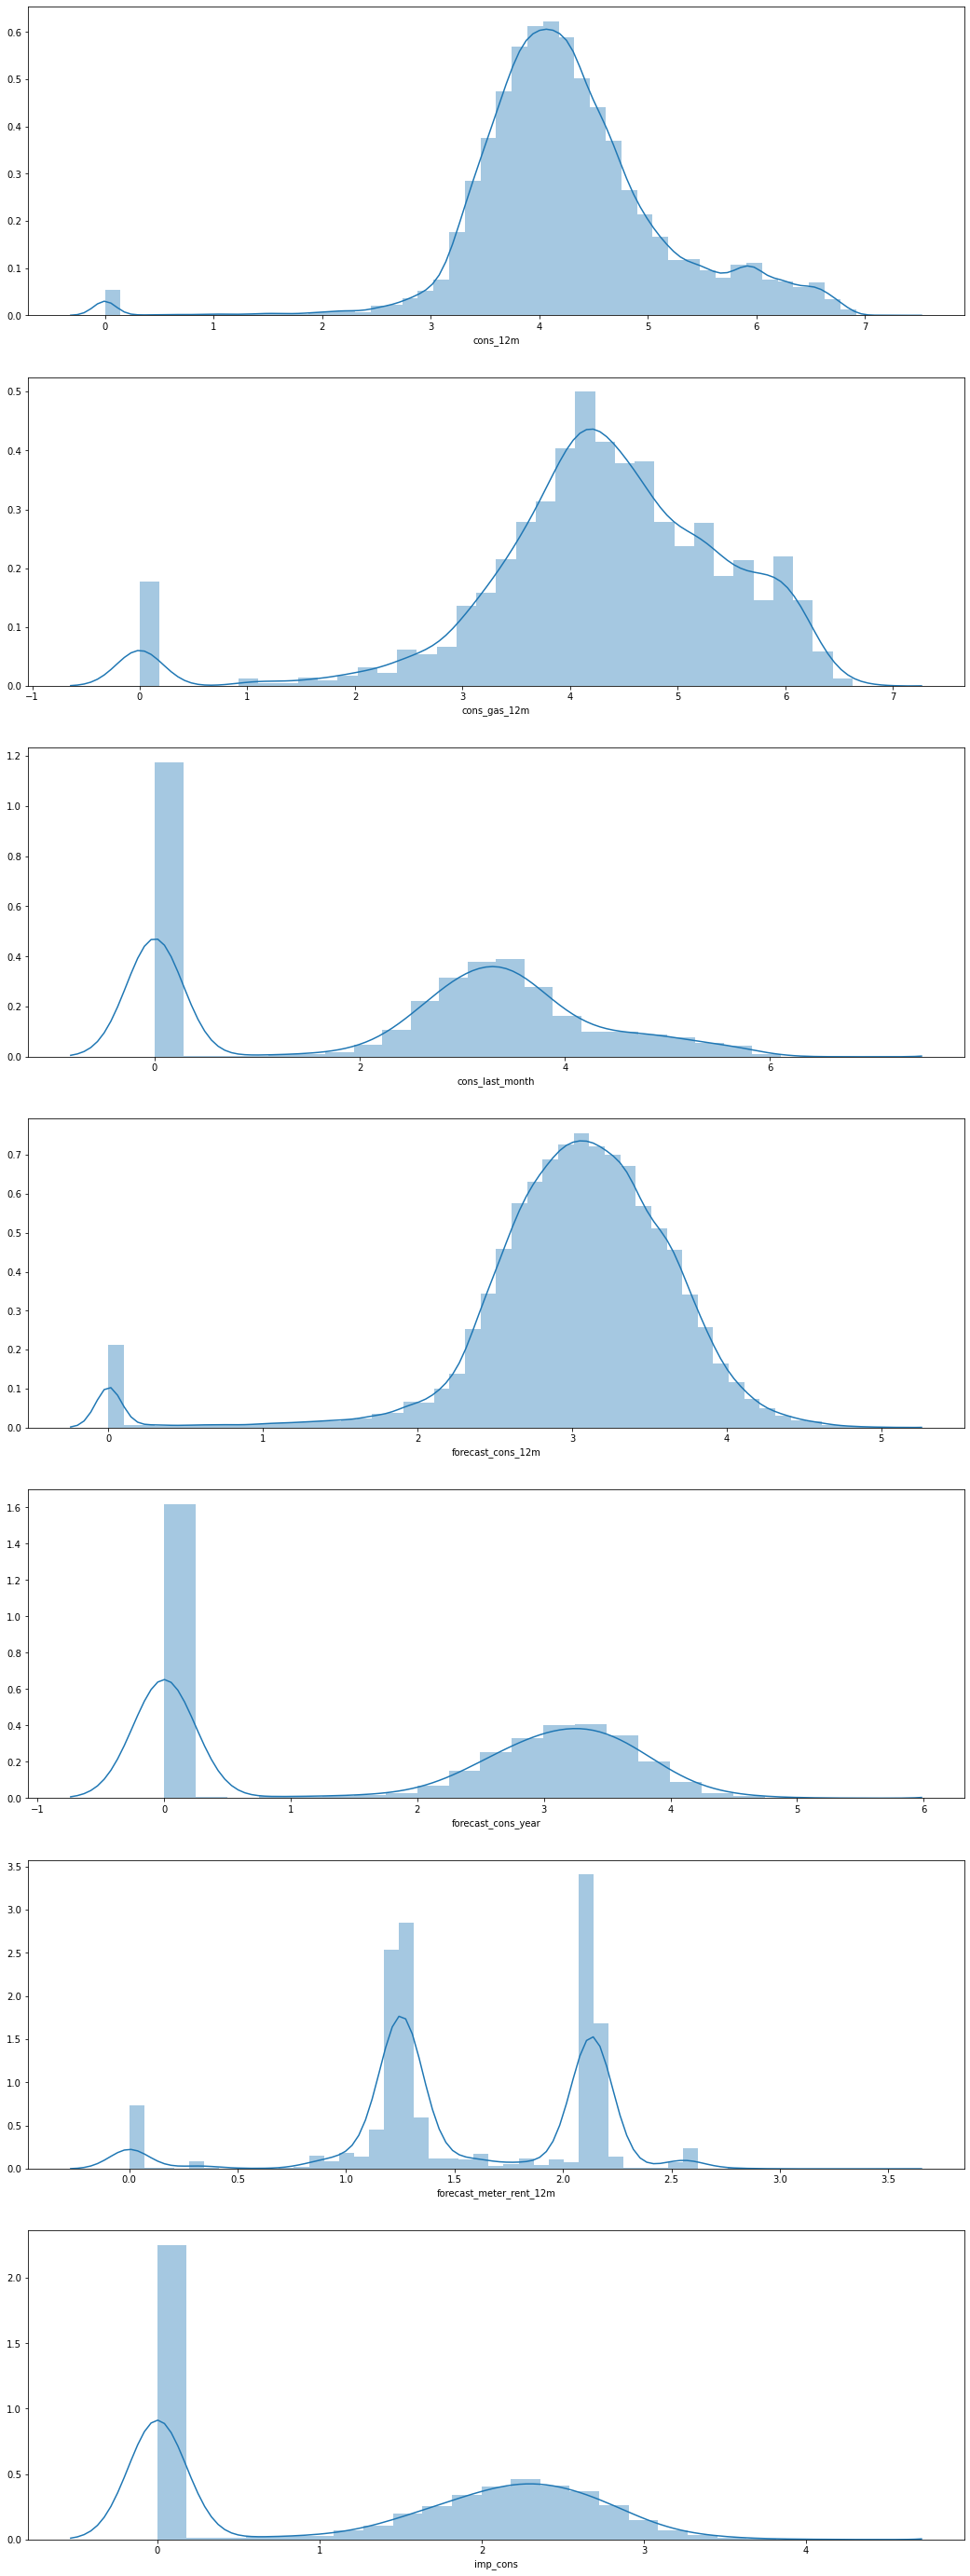

In [40]:
#plot the distribution
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

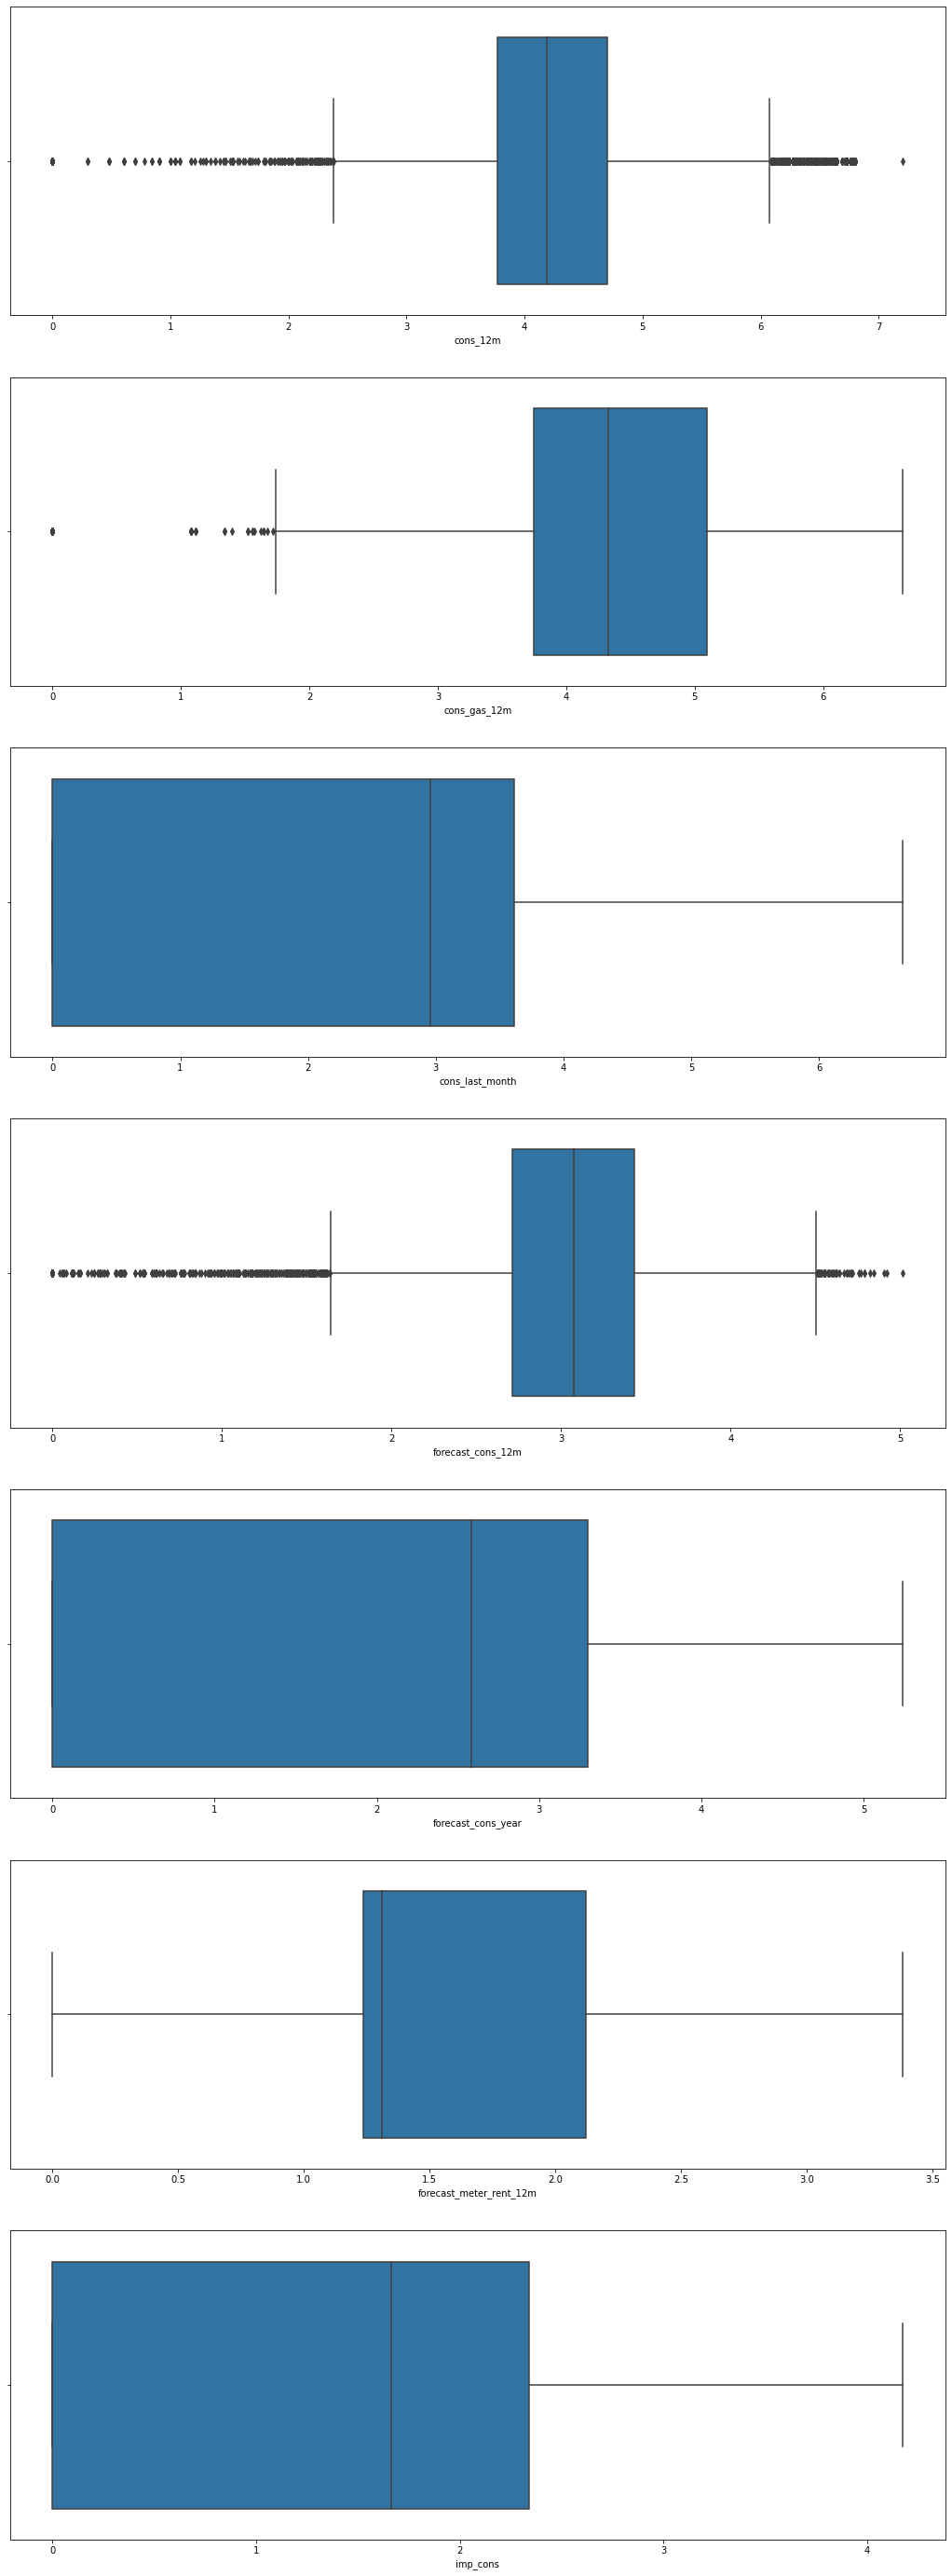

In [41]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [42]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,...,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.160969,0.589394,0.026252,0.048617,5.212252,...,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The distributions look much closer to normal distributions now!
Notice how the standard deviation std has changed.
From the boxplots we can still see some values are quite far from the range ( outliers ). We will deal with them later.

#clean high correlation variables

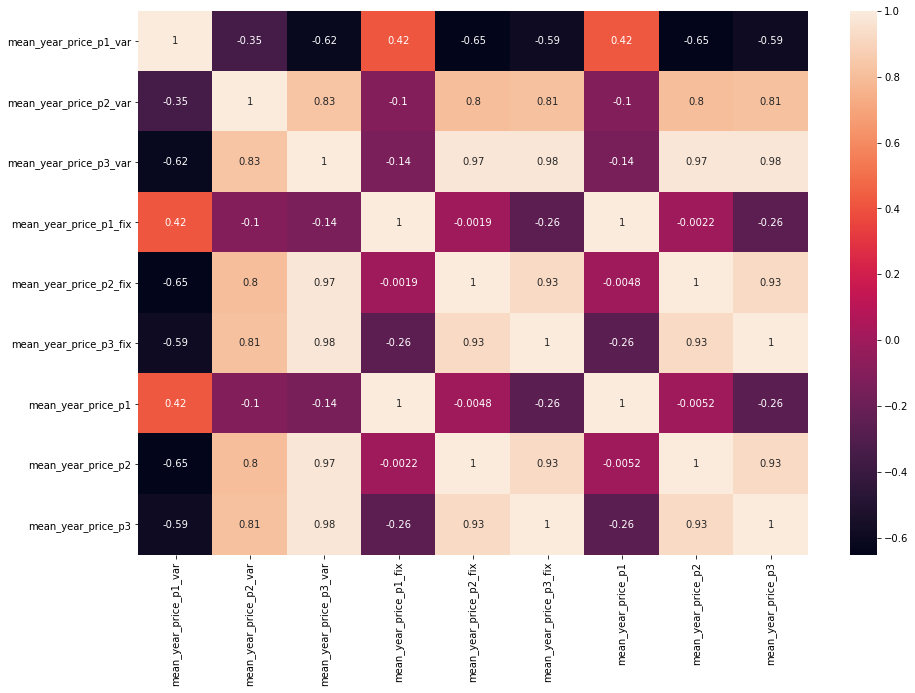

In [43]:
# Check for Corelation between Features - hist data - features
plt.figure(figsize=(15, 10))
sns.heatmap(features.corr(),yticklabels=True,cbar=True, annot = True)

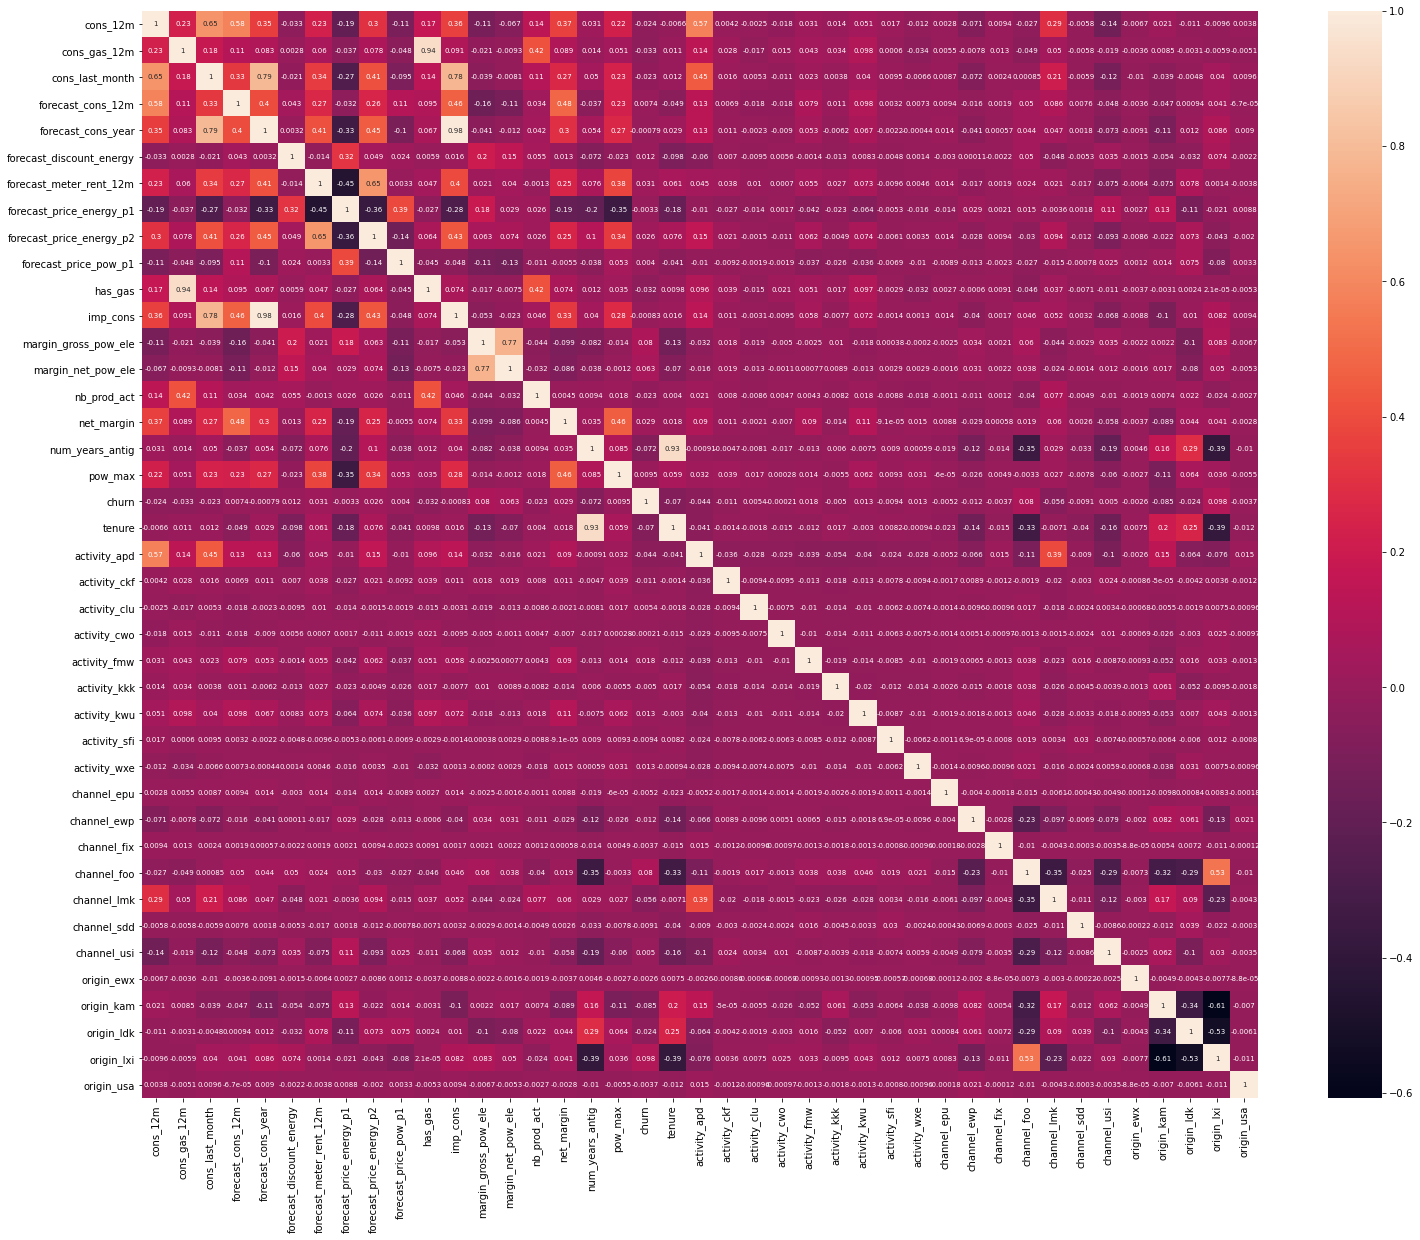

In [44]:
# Check for Corelation between Features - train data
plt.figure(figsize=(25, 20))
sns.heatmap(train.corr(),yticklabels=True,cbar=True, annot = True, annot_kws={'size':7})

num_years_antig has a high correlation with tenure and forecast_cons_year has a high correlation with imp_con(it provides us the same information).
We can remove variables with very high correlation.

In [45]:
train.drop(columns= ['num_years_antig','forecast_cons_year'], inplace = True)

#Remove outliers
Outlier critier: Data point that falls outside of 3 standard deviations.
We will find out the outliers and replace them with the mean.

In [46]:
from scipy.stats import zscore

def replace_outliers_z_score(dataframe, column, Z=3):

    
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

# Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

# Replace with mean values

    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

# Print message

    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [47]:
#replace null with mean in hist data
for c in features.columns:
    if c != "id":
        features = replace_outliers_z_score(features,c)

Replaced: 276  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 120  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 122  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [48]:
features.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000


In [49]:
features.reset_index(drop=True, inplace=True)

In [50]:
train = replace_outliers_z_score(train,"cons_12m")
train = replace_outliers_z_score(train,"cons_gas_12m")
train = replace_outliers_z_score(train,"cons_last_month")
train = replace_outliers_z_score(train,"forecast_cons_12m")
train = replace_outliers_z_score(train,"forecast_discount_energy")
train = replace_outliers_z_score(train,"forecast_meter_rent_12m")
train = replace_outliers_z_score(train,"forecast_price_energy_p1")
train = replace_outliers_z_score(train,"forecast_price_energy_p2")
train = replace_outliers_z_score(train,"forecast_price_pow_p1")
train = replace_outliers_z_score(train,"imp_cons")
train = replace_outliers_z_score(train,"margin_gross_pow_ele")
train = replace_outliers_z_score(train,"margin_net_pow_ele")
train = replace_outliers_z_score(train,"net_margin")
train = replace_outliers_z_score(train,"pow_max")

Replaced: 174  outliers in  cons_12m
Replaced: 118  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 425  outliers in  forecast_cons_12m
Replaced: 575  outliers in  forecast_discount_energy
Replaced: 1  outliers in  forecast_meter_rent_12m
Replaced: 300  outliers in  forecast_price_energy_p1
Replaced: 0  outliers in  forecast_price_energy_p2
Replaced: 240  outliers in  forecast_price_pow_p1
Replaced: 0  outliers in  imp_cons
Replaced: 238  outliers in  margin_gross_pow_ele
Replaced: 220  outliers in  margin_net_pow_ele
Replaced: 185  outliers in  net_margin
Replaced: 293  outliers in  pow_max


#pickling


In [51]:
PICKLE_TRAIN_DIR=os.path.join("..","processed_data","train_data.pkl")
PICKLE_HISTORY_DIR=os.path.join("..","processed_data","history_data.pkl")

In [52]:
pd.to_pickle(train,PICKLE_TRAIN_DIR)
pd.to_pickle(hist_data,PICKLE_HISTORY_DIR)